In [232]:
def readGenome(filename):
    genome = ""
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome = genome+line.rstrip()
    return genome
genome = readGenome("lambda_virus.fa")
genome         

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [233]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
print(counts)
for base in genome:
    counts[base] += 1
counts

{'A': 0, 'C': 0, 'G': 0, 'T': 0}


{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}

In [234]:
import collections

collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [235]:
!wget "http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [236]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename) as f:
        while True:
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qual = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seq, qual = read_fastq("human.fastq")
qual[:3]

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A']

Histograms of quality scores

In [237]:
def phred33ToQ(qual):
    return (ord(qual) - 33)
phred33ToQ('J')

41

In [238]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
seq, qual = read_fastq("human.fastq")
h = createHist(qual)


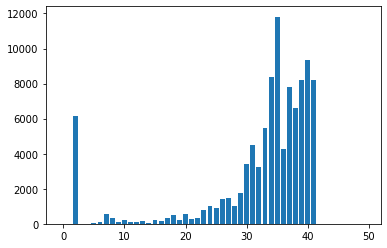

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(0,len(h)) ,h)
plt.show()

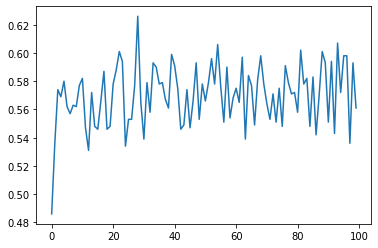

In [240]:
# GC content : Fraction of genome that contains the number of G and C

def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    for i in range(len(gc)):
        if(totals[i] > 0):
            gc[i] = gc[i] / float(totals[i])
            
    return gc
s = findGCByPos(seq)

plt.plot(range(0,len(s)) ,s)
plt.show()

In [241]:
import collections
count = collections.Counter()

seq, qual = read_fastq("human.fastq")

for s in seq:
    count.update(s)
print(count)



Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [242]:
t = "There would have been a time for such a word"
t.find("word")

40

In [243]:
genome = readGenome("phix.fa")

In [244]:
def naive(p,t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if(t[i+j] != p[j]):
                match = False
                break
        if(match == True):
            occurences.append(i)
    return occurences

In [245]:
import random
def generateRandomReads(genome, numReads, readLen):
    
    reads = []
    
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen)-1
        reads.append(genome[start:start+readLen])
    return reads

In [246]:
reads = generateRandomReads(genome, 100, 100)

numMatched = 0

for r in reads:
    matches = naive(r, genome)
    if(len(matches) > 0):
        numMatched += 1
print("%d / %d reads macthed exactly !" %(numMatched, len(reads)))

100 / 100 reads macthed exactly !


In [247]:
## Get the FASTQ file from above
phix_reads, _ = read_fastq("human.fastq")
genome = readGenome("phix.fa")

In [248]:
## Lets align this to the ref human genome
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]
    matches = naive(r,genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print("%d / %d reads macthed exactly !" %(numMatched, len(phix_reads)))
n

0 / 1000 reads macthed exactly !


1000

In [249]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('ACGTACG')

'CGTACGT'

In [250]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

0 / 1000 reads matched the genome exactly!


In [251]:
def naive_with_rc(p,t):
    p_rev = reverseComplement(p)
    occurences = []
    
    if(p == p_rev):
        occurences.extend(naive(p,t))
        
    else:
        for i in range(len(t) - len(p) +1):
            match = True
            for j in range(len(p)):
                if(t[i+j] != p[j]):
                    match = False
                    break
            if(match):
                occurences.append(i)
            
        for i in range(len(t) - len(p_rev) +1):
            match = True
            for j in range(len(p_rev)):
                if(t[i+j] != p_rev[j]):
                    match = False
                    break
            if(match):
                occurences.append(i)

    
    return occurences



In [252]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [253]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [254]:
phix_genome = readGenome("phix_1.fa")
lambda_virus_genome = readGenome("lambda_virus_1.fa")

In [305]:
occurrences = naive_with_rc('AGTCGA', lambda_virus_genome)
len(occurrences)
occurrences

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]

In [256]:
print('offset of leftmost occurrence: %d' % min(occurrences))

TypeError: 'int' object is not callable

In [ ]:
print('# occurrences: %d' % len(occurrences))

In [ ]:
phix_reads1, qual_reads = read_fastq("human1.fastq")

In [ ]:
qual_dict = {}
qual_list = []
for i in range(len(qual_reads)):
    for q in range(len(qual_reads[i])):
        qual_list.append(phred33ToQ(qual_reads[i][q]))
    qual_dict[i] = qual_list


In [ ]:
length_reads = len(qual_reads[1])
min_qual = [0] * length_reads

for i in range(length_reads):
    min = 100000
    for val in qual_dict.values():
        if(val[i] < min):
            min = val[i]
    min_qual[i] = min

min_val = 100000
for i in min_qual:
    if(i < min_val):
        min_val = i
min_qual.index(min_val)


for key, value in qual_dict.items():
    print(value[66])


In [289]:
def naive_2mm(p, t):
    occurences = []
    
    for i in range(len(t) - len(p) + 1):
        match = True
        mismatch = 0
        for j in range(len(p)):
            if (t[i+j] != p[j]):
                mismatch += 1
                if(mismatch > 2):
                    match = False
                    break
                
        if(match):
            occurences.append(i)
    return occurences

In [294]:
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [298]:
occurrences = naive_2mm('AGGAGGTT', lambda_virus_genome)
len(occurrences)

215

In [300]:
occurrences

[49,
 282,
 299,
 302,
 380,
 1560,
 1650,
 2235,
 2277,
 2400,
 2562,
 2565,
 2729,
 2823,
 3160,
 3181,
 3946,
 4210,
 4294,
 4309,
 4405,
 4580,
 5069,
 5159,
 5189,
 5231,
 5331,
 5519,
 5737,
 5882,
 5993,
 5996,
 6011,
 6312,
 6522,
 6585,
 6606,
 7316,
 7394,
 7819,
 7904,
 7966,
 7998,
 8534,
 8648,
 8946,
 9339,
 9354,
 9530,
 9842,
 9966,
 10041,
 10250,
 10416,
 10445,
 10484,
 10527,
 10874,
 11193,
 11292,
 11505,
 11568,
 11655,
 11745,
 11838,
 12078,
 12180,
 12222,
 12697,
 12745,
 12819,
 12880,
 12935,
 13011,
 13087,
 13256,
 13415,
 13526,
 13813,
 14259,
 15385,
 15473,
 16192,
 17101,
 17437,
 17755,
 17936,
 17989,
 18016,
 18040,
 18727,
 18853,
 18911,
 19232,
 19263,
 19310,
 19833,
 19929,
 19932,
 19947,
 19980,
 20793,
 20802,
 21305,
 21528,
 21627,
 21684,
 22414,
 22660,
 22670,
 22787,
 23326,
 24063,
 24145,
 24409,
 24595,
 24681,
 25120,
 25139,
 25210,
 25381,
 25384,
 25648,
 25664,
 25773,
 25987,
 26196,
 26208,
 26576,
 26587,
 26653,
 26736,
 

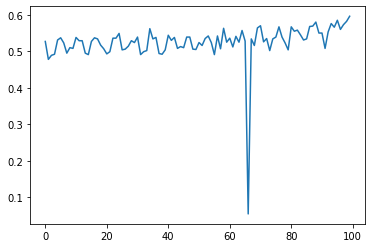

In [314]:
plt.plot(range(0,len(findGCByPos(phix_reads1))),findGCByPos(phix_reads1))